In [1]:
set.seed(1)
cell <- "random3" ## The correlation between x and y is weaker than random2 and also there are fewer data points (100 insttead of 1000)

In [2]:
hm <- matrix(rnorm(100*12), ncol= 12)
genes.TPM <- rowSums(hm) + rnorm(100, 0, .2)
genes.TPM[1:40] <- rnorm(40, 5, 2)
data <- cbind(genes.TPM, hm)

In [3]:
print(dim(data))

[1] 100  13


In [4]:
get.rss <- function(pred, y){
  n <- length(y)
  rmse <- sqrt(1 / n * sum((pred - y) ^ 2))
  return(rmse)
}

In [5]:
data.x <- data[, -1]
data.y <- data[, 1]


In [6]:
## OLS
library(MASS)

lm.res <- lm(data.y ~ as.matrix(data.x), y= T, x= T)
studres.res <- studres(lm.res);

stable.idx <- which(studres.res > 1)
unstable.idx <- which(studres.res < -1)

cols <- rep("black", length(studres.res));
cols[stable.idx] <- "red";
cols[unstable.idx] <- "blue";


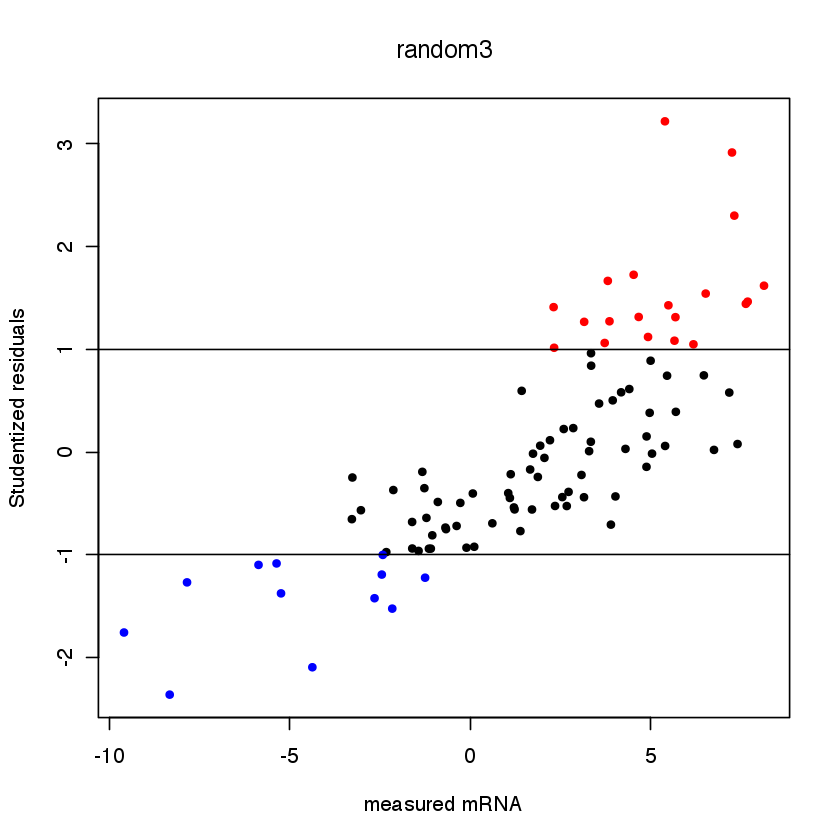

In [7]:
plot(lm.res$y, studres.res, pch= 20, col= cols, main= cell, xlab= "measured mRNA", ylab= "Studentized residuals")
abline(h= c(1, -1))


In [8]:
rmse <- round(get.rss(lm.res$fitted.values, lm.res$y), 2)
cor_p <- round(cor(lm.res$fitted.values, lm.res$y), 2)
cor_s <- round(cor(lm.res$fitted.values, lm.res$y, method= "spearman"), 2)

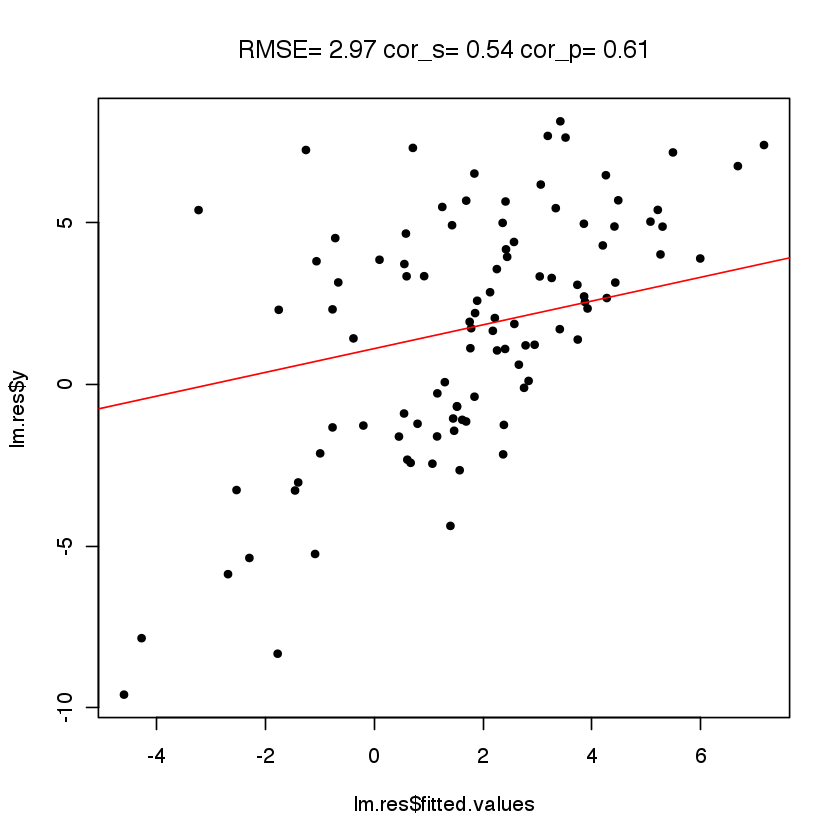

In [9]:
plot(lm.res$fitted.values, lm.res$y, pch= 20, main= paste("RMSE=", rmse, "cor_s=", cor_s, "cor_p=", cor_p))
abline(lm(lm.res$fitted.values ~ lm.res$y), col= "red")
